In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Read data into pandas dataframe
df = pd.read_csv('predictive_maintenance.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB
None


In [3]:
# Eliminate UDI and Product ID columns
df = df.drop('UDI',axis='columns')
df = df.drop('Product ID',axis='columns')
df.sample(5)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
9243,L,298.3,308.8,1454,49.0,166,0,No Failure
3694,M,302.1,311.3,1511,45.0,204,0,No Failure
7738,M,300.5,312.0,1263,60.8,146,0,No Failure
559,L,297.5,309.4,1503,40.6,144,0,No Failure
846,M,296.4,307.4,1416,50.0,210,0,No Failure


<AxesSubplot:title={'center':'Failure Count'}, xlabel='Failure', ylabel='# of machines'>

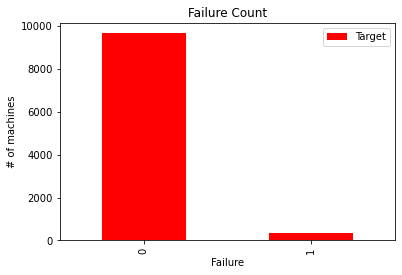

In [4]:
# Visualize Failure occurrence on data set
title='Failure Count'
xlabel = 'Failure'
ylabel = '# of machines'
legend = ['Failure','No failure']
df['Target'].value_counts().plot(kind = 'bar',legend = legend,xlabel=xlabel,ylabel=ylabel,title=title,color='r')

<AxesSubplot:title={'center':'Machine Quality'}, xlabel='Quality', ylabel='# of machines'>

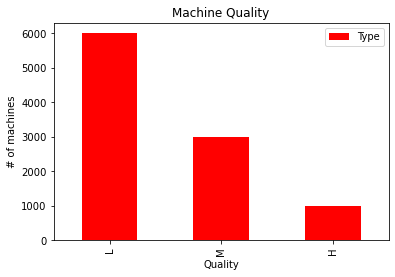

In [5]:
# Visualize Machine quaity incidence in data set
title='Machine Quality'
xlabel = 'Quality'
ylabel = '# of machines'
df['Type'].value_counts().plot(kind = 'bar',legend = legend,xlabel=xlabel,ylabel=ylabel,title=title,color='r')

<AxesSubplot:title={'center':'Failure Type'}, xlabel='Failure Type', ylabel='# of machines'>

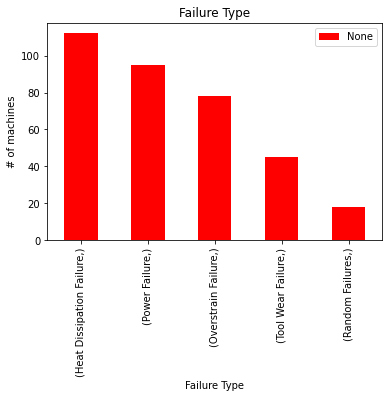

In [6]:
# Visualize failure types in data set
s = [failure for failure in df['Failure Type'] if failure != 'No Failure']
s = pd.DataFrame(s)

title='Failure Type'
xlabel = 'Failure Type'
ylabel = '# of machines'
d = s.value_counts()
d.plot(kind = 'bar',legend = legend,xlabel=xlabel,ylabel=ylabel,title=title,color='r')

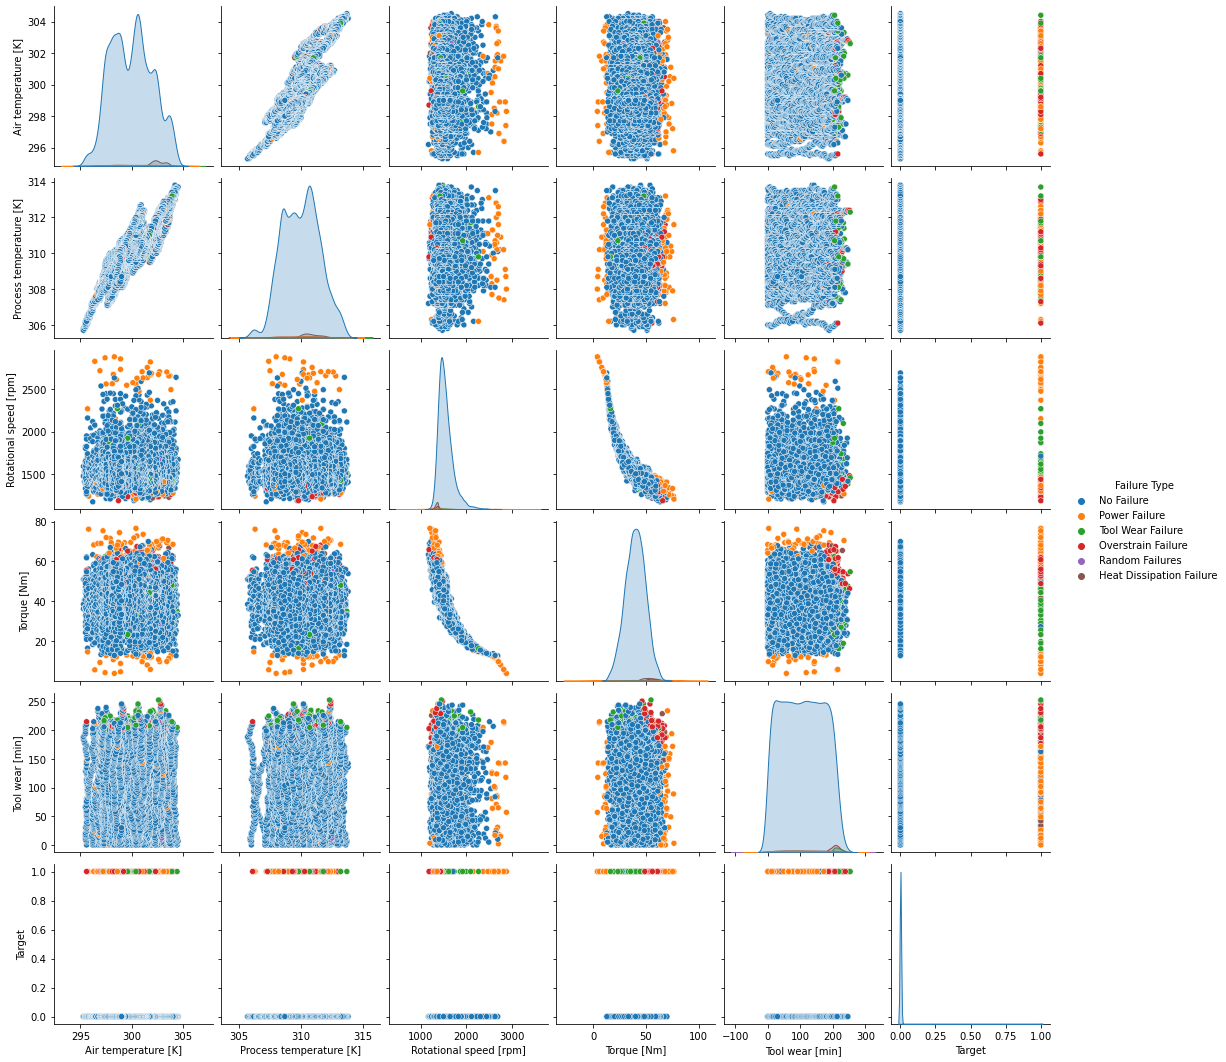

In [9]:
# Visualize trends in seaborn pair plot
import seaborn as sns
sns.pairplot(df, hue = 'Failure Type')

In [10]:
# Import logistic regression model usinf sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# label Enconder
enc = preprocessing.LabelEncoder()

# make copy of original data frame for modification
df1 = df.copy(deep=True)

# cconverting Failure Type and Type columns to numerical categories
df1['Failure Type']=enc.fit_transform(df1['Failure Type'])
df1['Type']=enc.fit_transform(df1['Type'])
df1.sample(5)


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
2001,1,298.4,308.2,1604,34.9,11,0,1
6034,2,300.6,310.8,1389,48.1,88,0,1
9292,1,298.2,309.0,1643,34.1,91,0,1
1544,1,298.4,309.0,1474,52.7,95,0,1
8666,1,297.5,308.7,1407,42.5,145,0,1


In [11]:
#Mapping encoded values to actual string values
f = df['Type'].value_counts()
ff = df1['Type'].value_counts()
print(f)
print('-----------')
print(ff)
print('------------------')

f = df['Failure Type'].value_counts()
ff = df1['Failure Type'].value_counts()
print(f)
print('-----------')
print(ff)

L    6000
M    2997
H    1003
Name: Type, dtype: int64
-----------
1    6000
2    2997
0    1003
Name: Type, dtype: int64
------------------
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64
-----------
1    9652
0     112
3      95
2      78
5      45
4      18
Name: Failure Type, dtype: int64


In [15]:
# Model - Target = Failure Type

# separate training data
X = df1[['Type','Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']]
y = df1['Failure Type']

# Split training data into training and test (70% training 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

#Logistic regression
logreg = LogisticRegression(solver='lbfgs',max_iter=10000)
logreg.fit(X_train,y_train)
logreg.get_params(deep=True)

#Return the mean accuracy on the given test data and labels.
score = logreg.score(X_test,y_test)
print('Mean accuracy on given test data: {}'.format(score))

# Return model parameters
print('\n Model parameters: {}'.format(logreg.get_params(deep=True)))

Mean accuracy on given test data: 0.9793333333333333

 Model parameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 10000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [16]:
# Funtion that returns actual string value of encoded prediction
def uncoded_prediction(prediction):
    pred = []
    if prediction == 1:
        pred.append("No Failure")
    if prediction == 2:
        pred.append('Overstrain Failure')
    if prediction == 3:
        pred.append('Power Failure')
    if prediction == 4:
        pred.append('Random Failures')
    if prediction == 5:
        pred.append('Tool Wear Failure')
    if prediction == 0:
        pred.append('Heat Dissipation Failure')
    return pred

In [17]:
#Testing model - making a few predictions

import warnings
warnings.filterwarnings('ignore')

x = np.array([[3,70,500,700,700,400]])
prediction = logreg.predict(x)[0]
un_pred = uncoded_prediction(prediction)

proba_prediction = logreg.predict_proba(x)

print(un_pred)
print('Prediction probability {}'.format(np.max(proba_prediction)))

print('-------------')

x = np.array([[1,303.3,311.4,1497,46,30]])
prediction = logreg.predict(x)[0]
un_pred = uncoded_prediction(prediction)

proba_prediction = logreg.predict_proba(x)

print(un_pred)
print('Prediction probability {}'.format(np.max(proba_prediction)))


['Power Failure']
Prediction probability 1.0
-------------
['No Failure']
Prediction probability 0.9898003494909875
